In [6]:
# Try to import Time distributed layer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import logging

# Fixing format of the label
def enc_label(label):
    code = 0
    if label == "right-turn":
        code = 1
    if label == "side":
        code = 2
    if label == "cuban-basic":
        code = 3
    if label == "suzie-q":
        code = 4
    return code

# Define hyperparameters
BATCH_SIZE = 8
EPOCHS = 150
MAX_SEQ_LENGTH = 40   # number of frames per figure
NUM_FEATURES = 75     # number of join coordinates

# Import the data
PATH_DATA_TRAIN = "Data_train_validate/Data_train_norm.csv"
PATH_DATA_VAL = "Data_train_validate/Data_val_norm.csv"
data_train = pd.read_csv(PATH_DATA_TRAIN)
data_val = pd.read_csv(PATH_DATA_VAL)

In [13]:
feat_cols = ['nose_x', 'nose_y',
       'neck_x', 'neck_y', 'rshoulder_x', 'rshoulder_y', 'relbow_x',
       'relbow_y', 'rwrist_x', 'rwrist_y', 'lshoulder_x', 'lshoulder_y',
       'lelbow_x', 'lelbow_y', 'lwrist_x', 'lwrist_y', 'midhip_x', 'midhip_y',
       'rhip_x', 'rhip_y', 'rknee_x', 'rknee_y', 'rankle_x', 'rankle_y',
       'lhip_x', 'lhip_y', 'lknee_x', 'lknee_y', 'lankle_x', 'lankle_y',
       'reye_x', 'reye_y', 'leye_x', 'leye_y', 'rear_x', 'rear_y', 'lear_x',
       'lear_y', 'lbigtoe_x', 'lbigtoe_y', 'lsmalltoe_x', 'lsmalltoe_y',
       'lheal_x', 'lheal_y', 'rbigtoe_x', 'rbigtoe_y', 'rsmalltoe_x',
       'rsmalltoe_y', 'rheal_x', 'rheal_y', 'nose_v', 'neck_v', 'rshoulder_v',
       'relbow_v', 'rwrist_v', 'lshoulder_v', 'lelbow_v', 'lwrist_v',
       'midhip_v', 'rhip_v', 'rknee_v', 'rankle_v', 'lhip_v', 'lknee_v',
       'lankle_v', 'reye_v', 'leye_v', 'rear_v', 'lear_v', 'lbigtoe_v',
       'lsmalltoe_v', 'lheal_v', 'rbigtoe_v', 'rsmalltoe_v', 'rheal_v']

assert len(feat_cols) == NUM_FEATURES

In [42]:
data_train

,Unnamed: 0,clip_name,frame_nr,person_id,nose_x,nose_y,neck_x,neck_y,rshoulder_x,rshoulder_y,...,lear_v,lbigtoe_v,lsmalltoe_v,lheal_v,rbigtoe_v,rsmalltoe_v,rheal_v,label,status,figure_id
0,0,1P-Person1-whole,1088,0.0,0.681696,0.853538,0.737357,0.207688,0.833340,0.141048,...,0.910062,0.722660,0.741301,0.726582,0.357497,0.268698,0.845678,basic,S,331
1,1,1P-Person1-whole,1089,0.0,0.675229,0.853538,0.730654,0.212059,0.822882,0.133202,...,0.897884,0.695361,0.729914,0.749858,0.330250,0.268070,0.859535,basic,NaN,331
2,2,1P-Person1-whole,1090,0.0,0.671985,0.853556,0.728756,0.227185,0.810413,0.134718,...,0.908143,0.742254,0.773109,0.752221,0.355033,0.280502,0.854643,basic,NaN,331
3,3,1P-Person1-whole,1091,0.0,0.666657,0.853571,0.725627,0.248969,0.794781,0.145861,...,0.914858,0.722774,0.747182,0.724742,0.387913,0.309943,0.841137,basic,NaN,331
4,4,1P-Person1-whole,1092,0.0,0.662175,0.853559,0.721041,0.272874,0.780143,0.160763,...,0.932259,0.730320,0.745609,0.735101,0.376587,0.307099,0.813370,basic,NaN,331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35917,35917,1p_Raquelinha_05122021_choreo1,1150,0.0,0.368124,0.238937,0.579055,0.331586,0.458902,0.398520,...,0.626070,0.118908,0.225104,0.615143,0.681235,0.602938,0.708253,right-turn,NaN,373
35918,35918,1p_Raquelinha_05122021_choreo1,1151,0.0,0.349522,0.238752,0.551927,0.330623,0.437454,0.384876,...,0.657589,0.453001,0.469065,0.544748,0.702531,0.621746,0.720601,right-turn,NaN,373
35919,35919,1p_Raquelinha_05122021_choreo1,1152,0.0,0.328244,0.241111,0.531305,0.338267,0.429213,0.373049,...,0.633111,0.482225,0.542154,0.514200,0.699267,0.626162,0.730300,right-turn,NaN,373
35920,35920,1p_Raquelinha_05122021_choreo1,1153,0.0,0.310600,0.242025,0.509489,0.327679,0.428650,0.348569,...,0.625895,0.559149,0.542130,0.502527,0.698190,0.625318,0.702042,right-turn,NaN,373


In [41]:
# Function to select a number of frames per figure and right in the correct format for the mdoel
def transf_data(data):
    # Data preprocessing, get the input X and the label y
    ind_start = data[data['status'] == "S"].index.tolist()
    ind_end = data[data['status'] == "E"].index.tolist()

    # Take intervals between consecutive "S", they define one figure
    X = []
    y = []
    info = []

    for i in range(len(ind_start) - 1):
        X.append(data.loc[ind_start[i]: ind_end[i], feat_cols])  # - 3 the last 25 (visibility ) + 2
        y.append(data.loc[ind_start[i], 'label'])
        info.append( data.loc[ind_start[i], ['clip_name', 'frame_nr']] )
      
    
    # select frames from the interval
    ind_samp = []

    for i in range(len(ind_start) - 1):
        # Take frames that are evenlly distributed
        aux = np.linspace(ind_start[i]
                          , ind_end[i]
                          , MAX_SEQ_LENGTH
                          , endpoint=False).astype(int)

        # random
        # aux = np.random.randint(ind_start[i], ind_end[i], MAX_SEQ_LENGTH)
        # aux.sort()
        ind_samp.append(aux)

    # Changing format of the data to be compatible with Tensor Flow
    X = [x.loc[ind_samp[ind], :].to_numpy() for (ind, x) in enumerate(X)]
    X = np.array(X)
    X = X.reshape(len(ind_start) - 1, MAX_SEQ_LENGTH, NUM_FEATURES).astype("float32")
    # TODO: decide of the X values need to be normalized
    y = [enc_label(x) for x in y]
    y = np.array(y).astype("float32")

    return X, y, info

# Train set
X_train, y_train, info_train = transf_data(data_train)
X_val, y_val, info_val = transf_data(data_val)

     nose_x    nose_y    neck_x    neck_y  rshoulder_x  rshoulder_y  relbow_x  \
0  0.681696  0.853538  0.737357  0.207688     0.833340     0.141048  0.659949   
1  0.675229  0.853538  0.730654  0.212059     0.822882     0.133202  0.649326   
2  0.671985  0.853556  0.728756  0.227185     0.810413     0.134718  0.660899   
3  0.666657  0.853571  0.725627  0.248969     0.794781     0.145861  0.685055   
4  0.662175  0.853559  0.721041  0.272874     0.780143     0.160763  0.692836   

   relbow_y  rwrist_x  rwrist_y  ...  reye_v    leye_v  rear_v    lear_v  \
0  0.285909  0.430329  0.282942  ...     0.0  0.883145     0.0  0.910062   
1  0.292344  0.421296  0.292281  ...     0.0  0.875510     0.0  0.897884   
2  0.315080  0.425772  0.326848  ...     0.0  0.882117     0.0  0.908143   
3  0.348644  0.487102  0.452482  ...     0.0  0.881318     0.0  0.914858   
4  0.390540  0.513351  0.526399  ...     0.0  0.905783     0.0  0.932259   

   lbigtoe_v  lsmalltoe_v   lheal_v  rbigtoe_v  rsmallto

In [22]:
info_train[0]['clip_name']

'1P-Person1-whole'

In [23]:
# Build the model
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(MAX_SEQ_LENGTH, NUM_FEATURES)))
model.add(layers.GRU(64, return_sequences=True))
model.add(layers.Dropout(0.6))
model.add(layers.GRU(32))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(5, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 40, 64)            27072     
                                                                 
 dropout_1 (Dropout)         (None, 40, 64)            0         
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 5)                 165       
                                                                 
Total params: 37,701
Trainable params: 37,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Check the trainning accuracy
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_val, y_val)
)


Epoch 1/150
48/48 [==============================] - 9s 77ms/step - loss: 1.6481 - accuracy: 0.1901 - val_loss: 1.6171 - val_accuracy: 0.2021
Epoch 2/150
48/48 [==============================] - 2s 44ms/step - loss: 1.6193 - accuracy: 0.1979 - val_loss: 1.6086 - val_accuracy: 0.2234
Epoch 3/150
48/48 [==============================] - 2s 41ms/step - loss: 1.6051 - accuracy: 0.2422 - val_loss: 1.6048 - val_accuracy: 0.2340
Epoch 4/150
48/48 [==============================] - 2s 41ms/step - loss: 1.6114 - accuracy: 0.2448 - val_loss: 1.6064 - val_accuracy: 0.1809
Epoch 5/150
48/48 [==============================] - 2s 39ms/step - loss: 1.6246 - accuracy: 0.1797 - val_loss: 1.6111 - val_accuracy: 0.2234
Epoch 6/150
48/48 [==============================] - 2s 39ms/step - loss: 1.6014 - accuracy: 0.2448 - val_loss: 1.6041 - val_accuracy: 0.2021
Epoch 7/150
48/48 [==============================] - 2s 38ms/step - loss: 1.5926 - accuracy: 0.2448 - val_loss: 1.6200 - val_accuracy: 0.2553
Epoch 

48/48 [==============================] - 2s 41ms/step - loss: 0.2803 - accuracy: 0.9010 - val_loss: 1.7821 - val_accuracy: 0.5532
Epoch 59/150
48/48 [==============================] - 2s 39ms/step - loss: 0.3752 - accuracy: 0.8464 - val_loss: 1.8832 - val_accuracy: 0.5532
Epoch 60/150
48/48 [==============================] - 2s 48ms/step - loss: 0.2955 - accuracy: 0.8958 - val_loss: 1.5996 - val_accuracy: 0.6383
Epoch 61/150
48/48 [==============================] - 2s 44ms/step - loss: 0.3957 - accuracy: 0.8594 - val_loss: 1.9503 - val_accuracy: 0.5745
Epoch 62/150
48/48 [==============================] - 2s 43ms/step - loss: 0.3698 - accuracy: 0.8568 - val_loss: 1.7756 - val_accuracy: 0.5532
Epoch 63/150
48/48 [==============================] - 2s 43ms/step - loss: 0.2884 - accuracy: 0.8828 - val_loss: 1.6274 - val_accuracy: 0.5957
Epoch 64/150
48/48 [==============================] - 2s 40ms/step - loss: 0.2525 - accuracy: 0.9010 - val_loss: 1.8581 - val_accuracy: 0.5957
Epoch 65/150

48/48 [==============================] - 2s 49ms/step - loss: 0.1079 - accuracy: 0.9557 - val_loss: 2.1659 - val_accuracy: 0.6170
Epoch 116/150
48/48 [==============================] - 2s 43ms/step - loss: 0.1054 - accuracy: 0.9740 - val_loss: 2.1530 - val_accuracy: 0.5745
Epoch 117/150
48/48 [==============================] - 2s 40ms/step - loss: 0.1276 - accuracy: 0.9583 - val_loss: 2.1135 - val_accuracy: 0.6064
Epoch 118/150
48/48 [==============================] - 2s 47ms/step - loss: 0.2135 - accuracy: 0.9297 - val_loss: 2.1517 - val_accuracy: 0.5851
Epoch 119/150
48/48 [==============================] - 2s 42ms/step - loss: 0.1553 - accuracy: 0.9453 - val_loss: 1.9382 - val_accuracy: 0.6170
Epoch 120/150
48/48 [==============================] - 2s 44ms/step - loss: 0.0677 - accuracy: 0.9818 - val_loss: 2.0565 - val_accuracy: 0.5638
Epoch 121/150
48/48 [==============================] - 2s 41ms/step - loss: 0.0855 - accuracy: 0.9766 - val_loss: 2.0272 - val_accuracy: 0.6064
Epoch 

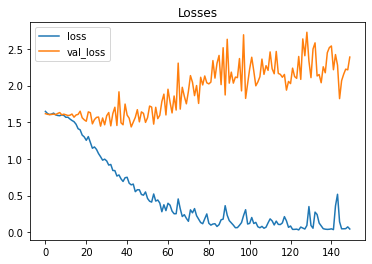

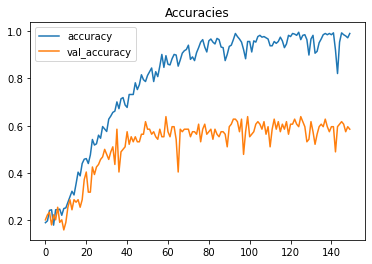

In [25]:
# Checking accuracies
def render_history(history):
    plt.plot(history["loss"], label="loss")
    plt.plot(history["val_loss"], label="val_loss")
    plt.legend()
    plt.title("Losses")
    plt.show()
    plt.close()

    plt.plot(history["accuracy"], label="accuracy")
    plt.plot(history["val_accuracy"], label="val_accuracy")
    plt.legend()
    plt.title("Accuracies")
    plt.show()
    plt.close()

render_history(history.history)



In [43]:
# Checking the predictions for the validation set
classes = { 0.: "basic",
            1.: "right-turn",
            2.: "side",
            3.: "cuban-basic",
            4.: "suzie-q"
           }

def check_pred(ind):
    pred = model.predict( np.expand_dims(X_val[ind], axis=0) )[0]
    clip_name = info_val[ind]["clip_name"]
    nu_frame = info_val[ind]["frame_nr"]
    
    print(f"Real: Label {classes[ y_val[ind]]} \n")
    print(f"Source: Video {clip_name} Frame {nu_frame} \n")
    #print(f"Prediction Score {}")
    for ind_i, i in enumerate(classes.keys()):        
        print(f"  {classes[i]}: {pred[ind_i] * 100:5.2f}%")       


In [44]:
for i in range(X_val.shape[0]):
    check_pred(i)
    print("\n")

Real: Label basic 

Source: Video 1p_Dirk_choreo1_04.12.2021 Frame 3086 

  basic:  4.35%
  right-turn:  0.00%
  side:  0.06%
  cuban-basic: 95.59%
  suzie-q:  0.00%


Real: Label basic 

Source: Video 1p_Raquelinha_05122021_choreo1 Frame 828 

  basic:  6.18%
  right-turn:  0.15%
  side:  0.65%
  cuban-basic: 63.22%
  suzie-q: 29.80%


Real: Label basic 

Source: Video 1p_sarah_salsa_basics_choreo1 Frame 1717 

  basic: 10.19%
  right-turn:  1.44%
  side: 15.11%
  cuban-basic: 73.21%
  suzie-q:  0.05%


Real: Label basic 

Source: Video 1P-Person1-whole Frame 1860 

  basic: 97.85%
  right-turn:  0.06%
  side:  1.29%
  cuban-basic:  0.29%
  suzie-q:  0.52%


Real: Label basic 

Source: Video 1P-Person1-whole Frame 2889 

  basic: 99.79%
  right-turn:  0.01%
  side:  0.04%
  cuban-basic:  0.16%
  suzie-q:  0.00%


Real: Label basic 

Source: Video 1p_Eero_4_05122021_choreo1 Frame 3104 

  basic: 99.97%
  right-turn:  0.01%
  side:  0.00%
  cuban-basic:  0.01%
  suzie-q:  0.00%


Real: 

Real: Label suzie-q 

Source: Video 1p_sarah_salsa_basics_choreo1 Frame 810 

  basic:  8.81%
  right-turn:  0.03%
  side: 19.45%
  cuban-basic: 27.38%
  suzie-q: 44.33%


Real: Label suzie-q 

Source: Video 1p_sarah_salsa_basics_choreo1 Frame 3288 

  basic:  0.04%
  right-turn:  0.00%
  side:  0.00%
  cuban-basic:  0.07%
  suzie-q: 99.89%


Real: Label suzie-q 

Source: Video 1p_Stef_2_05122021_Choreo1 Frame 3540 

  basic:  0.00%
  right-turn:  0.01%
  side:  0.00%
  cuban-basic:  5.33%
  suzie-q: 94.65%


Real: Label suzie-q 

Source: Video 1p_Eero_7_05122021_choreo1 Frame 1960 

  basic: 99.64%
  right-turn:  0.01%
  side:  0.18%
  cuban-basic:  0.01%
  suzie-q:  0.16%


Real: Label suzie-q 

Source: Video 1p_Stef_2_05122021_Choreo1 Frame 1788 

  basic: 92.95%
  right-turn:  0.00%
  side:  0.27%
  cuban-basic:  0.01%
  suzie-q:  6.77%


Real: Label suzie-q 

Source: Video 1p_Eero_4_05122021_choreo1 Frame 1924 

  basic:  0.85%
  right-turn:  2.31%
  side: 25.19%
  cuban-basic: 71

In [35]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [37]:
def enc_y(y):
    y = int(y)
    p_y = np.zeros(5)   
    p_y[y] = 1.
    return p_y

y_pred = model.predict(X_val)
classes_x = np.argmax(y_pred, axis=1)

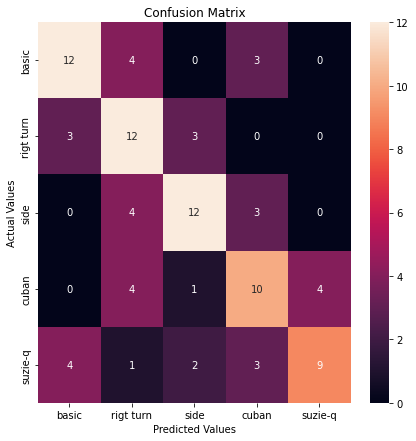

In [38]:
cm = confusion_matrix(y_val, classes_x)
cm_df = pd.DataFrame(cm,
                     index = ['basic','rigt turn','side', 'cuban', 'suzie-q'], 
                     columns = ['basic','rigt turn','side', 'cuban', 'suzie-q'])


#Plotting the confusion matrix
plt.figure(figsize=(7,7))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [40]:
# Save a particular model as pkl
import pickle
filename = 'trained_model/GRU_model.pkl'
pickle.dump(model, open(filename, 'wb'))

2021-12-15 14:24:03.212490: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://7a214126-c713-4ec8-9007-ea460eeb05ba/assets


INFO:tensorflow:Assets written to: ram://7a214126-c713-4ec8-9007-ea460eeb05ba/assets
